# NBA linear regression

#### Prepared by: Rania Almneie - Hanadi Alshahrani - Najd Alqahtani

## Overview:

The National Basketball Association is a professional basketball league in North America. To measure the performance of their players and predict their future performance, statistic will help us to determine that.

## Goal:

We'll use NBA season statistics to build a basic linear regression model to predict number of points for players.

## Question:

Can a linear regression model predict the number of points in a future season and which features used in the model?

## Data Description:

Data was extracted from the NBA website for players composed of 536 observations and 7 features which are:

* PLAYER: Player names.
* MIN (Minutes Played): The number of minutes played by a player or team.
* PTS (Points): The number of points scored.
* FGM (Field Goals Made): The number of field goals that a player or team has made. This includes both 2 pointers and 3.
* 3PM (3 Point Field Goals Made): The number of 3 point field goals that a player or team has made.
* FTM (Free Throws Made): The number of free throws that a player or team has made.
* FP (Fantasy Points): The number of fantasy points a player accumulates.

The y-variable will be the number of points (PTS), and the x-variable will be determined by the best model


## Tools :

* Pandas
* NumPy
* Sklearn
* seaborn
* matplotlib
* Selenium
* Tableau
* BeautifulSoup

#### Importing Libraries : To import necessary libraries

In [1237]:
#For web scraping
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
from time import sleep

#For data manipulation
import pandas as pd
import numpy as np

#For plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## 1- Web scraping (Selenium) :

Obtain the data from NBA website :

In [1238]:
URL = "https://www.nba.com/stats/players/traditional/?SeasonType=Preseason&sort=PLAYER_NAME&dir=1"
driver = webdriver.Chrome(r"C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe")
driver.get(URL)

sleep(2)

try:    
#To click Accept
 button = driver.find_element_by_id("onetrust-accept-btn-handler")
 button.click()
except:
    pass

sleep(2)

#To choose (All) from dropdown list
selectOne=driver.find_element_by_xpath("//div[@class='stats-table-pagination__info']/select")
selectTwo=Select(selectOne)
selectTwo.select_by_visible_text('All')

soup = BeautifulSoup(driver.page_source, "lxml")

<ipython-input-1238-079325357cfc>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe")
<ipython-input-1238-079325357cfc>:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  button = driver.find_element_by_id("onetrust-accept-btn-handler")
<ipython-input-1238-079325357cfc>:17: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  selectOne=driver.find_element_by_xpath("//div[@class='stats-table-pagination__info']/select")


In [ ]:
print(soup.prettify())

This method is to read the statistical table from NBA website :

In [372]:
def read_table():
 #To get all tr in one page   
 table=soup.findAll("tr")
 table_data=table[1:537]

 #------------------------------------
  
 columns =['PLAYER','MIN','PTS','FGM','3PM','FTM','FP']  
 # use getText()to extract the text we need into a list
 headers=[th.getText().replace('\n','').strip() for th in table[0].findAll('th') if th.getText().replace('\n','').strip() in columns]
    
 #-------------------------------------
 Players=[]
 pos=[1,7,8,9,12,15,26]
 for i in range(len(table_data)):
    
    temp=[]
  
    for j,td in enumerate(table_data[i].find_all("td")):
          if j in pos:
             temp.append(td.text.strip())
        
    Players.append(temp)
    
 df=pd.DataFrame(Players,columns=headers)
 
 return df 


In [1240]:
df_player=read_table()

In [1241]:
#To change the data type
df_player=df_player.astype({"PLAYER":str,"MIN": float, "PTS": float, "FGM": float, "3PM": float, "FTM": float, "FP": float})

In [1351]:
#To see the columns
df_player.columns

Index(['PLAYER', 'MIN', 'PTS', 'FGM', '3PM', 'FTM', 'FP'], dtype='object')

In [378]:
#Saving a df_player Dataframe as a CSV
df_player.to_csv('Players_data.csv')

In [1502]:
#Read CSV file
df=pd.read_csv('Players_data.csv')

In [1504]:
df

,PLAYER,MIN,PTS,FGM,3PM,FTM,FP
0,Ziaire Williams,22.8,8.2,2.6,0.6,2.4,15.7
1,Zeke Nnaji,14.3,3.6,1.4,0.6,0.2,10.2
2,Zach LaVine,29.0,22.5,7.8,2.8,4.3,33.8
3,Yves Pons,12.2,2.2,0.8,0.2,0.4,6.9
4,Yuta Watanabe,16.9,10.0,4.0,2.0,0.0,30.4
...,...,...,...,...,...,...,...
531,Aaron Holiday,16.7,9.3,3.5,0.8,1.5,18.1
532,Aaron Henry,12.8,2.5,1.0,0.3,0.3,11.1
533,Aaron Gordon,23.8,9.3,3.0,1.0,2.3,19.4
534,Aamir Simms,6.8,2.0,0.5,0.0,1.0,6.5


## 2-EDA :

In [1505]:
#To see the shape of df
df.shape

(536, 7)

The dataset contain 536 rows and 13 columns.

Let’s take a look at what our dataset actually looks like

In [1506]:
#To display the first 5 rows :
df.head()

,PLAYER,MIN,PTS,FGM,3PM,FTM,FP
0,Ziaire Williams,22.8,8.2,2.6,0.6,2.4,15.7
1,Zeke Nnaji,14.3,3.6,1.4,0.6,0.2,10.2
2,Zach LaVine,29.0,22.5,7.8,2.8,4.3,33.8
3,Yves Pons,12.2,2.2,0.8,0.2,0.4,6.9
4,Yuta Watanabe,16.9,10.0,4.0,2.0,0.0,30.4


In [1507]:
#To take a sample from df
df.sample(5)

,PLAYER,MIN,PTS,FGM,3PM,FTM,FP
89,Robin Lopez,14.8,1.3,0.7,0.0,0.0,9.1
250,Joshua Primo,9.7,5.8,2.4,1.0,0.0,8.2
229,Kelly Oubre Jr.,13.6,5.0,2.0,0.0,1.0,16.4
422,DeMar DeRozan,29.3,16.8,6.5,0.8,3.0,25.9
213,Khris Middleton,21.2,19.5,7.5,2.5,2.0,30.6


In [1508]:
#To check missings with .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  536 non-null    object 
 1   MIN     536 non-null    float64
 2   PTS     536 non-null    float64
 3   FGM     536 non-null    float64
 4   3PM     536 non-null    float64
 5   FTM     536 non-null    float64
 6   FP      536 non-null    float64
dtypes: float64(6), object(1)
memory usage: 29.4+ KB


In [1509]:
#check missings with .isna() then apply sum()
df.isnull().sum()

PLAYER    0
MIN       0
PTS       0
FGM       0
3PM       0
FTM       0
FP        0
dtype: int64

- As the result showed, there are no missing values.

- To see statistical details of the dataset, we can use df.describe()

In [1510]:
#To describe the numerical data (count,mean,std,min,25%,50%,75%,max)
df.describe()

,MIN,PTS,FGM,3PM,FTM,FP
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,16.978358,7.646828,2.820522,0.909888,1.127612,16.069776
std,6.273971,4.807143,1.775437,0.915901,1.128999,8.295542
min,1.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,12.700000,4.000000,1.400000,0.000000,0.300000,9.775000
50%,17.800000,6.800000,2.500000,0.700000,1.000000,15.600000
75%,21.500000,10.800000,4.000000,1.300000,1.625000,21.800000
max,32.700000,25.000000,8.500000,4.300000,5.800000,43.600000


- To check the duplicate rows :

In [1511]:
df2=df.drop_duplicates(subset=["PLAYER"])
print(f"The shape of dataframe before drop duplicates : {df.shape}")
print(f"The shape of dataframe after drop duplicates : {df2.shape}")

The shape of dataframe before drop duplicates : (536, 7)
The shape of dataframe after drop duplicates : (536, 7)


- As the result showed, there are no duplicate rows 

- To see the outliers :

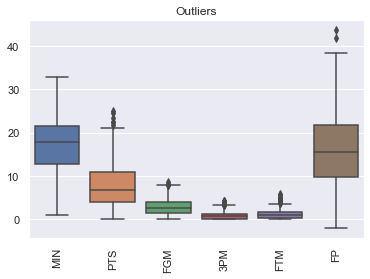

In [1512]:
sns.boxplot(data=df)
plt.xticks(rotation=90);
plt.title("Outliers");

- This method is to handle the outliers by using the IQR :

In [1513]:
def handle_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    mean=df.mean()
    df_new=df.map(lambda x:x if (x>= Q1 - 1.5 * IQR) & (x <= Q3 + 1.5 *IQR) else mean)
    return df_new

In [1514]:
df["PTS"]=handle_outlier_IQR(df['PTS'])
df["FGM"]=handle_outlier_IQR(df['FGM'])
df["3PM"]=handle_outlier_IQR(df['3PM'])
df["FTM"]=handle_outlier_IQR(df['FTM'])
df["FP"]=handle_outlier_IQR(df['FP'])

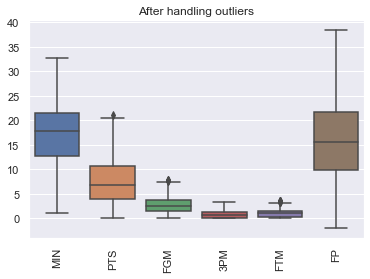

In [1515]:
sns.boxplot(data=df)
plt.xticks(rotation=90);
plt.title("After handling outliers");

* To see the distribution of PTS :

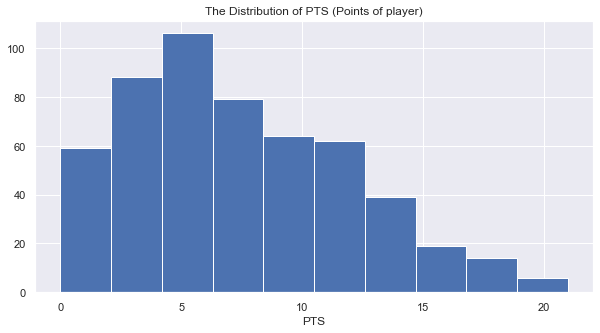

In [1516]:
plt.figure(figsize=(10,5))
plt.hist(df.PTS)
plt.title('The Distribution of PTS (Points of player)');
plt.xlabel("PTS");

* To see the distribution of MIN :

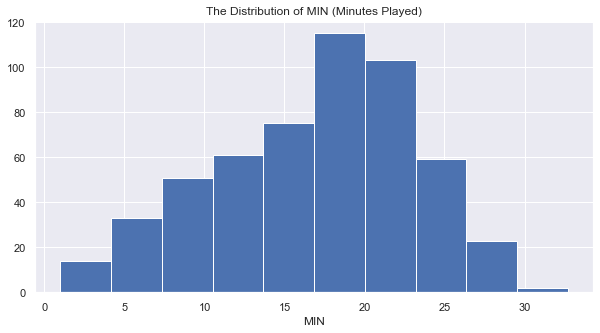

In [1517]:
plt.figure(figsize=(10,5))
plt.hist(df.MIN)
plt.title('The Distribution of MIN (Minutes Played)');
plt.xlabel("MIN");

* To see the distribution of FGM :

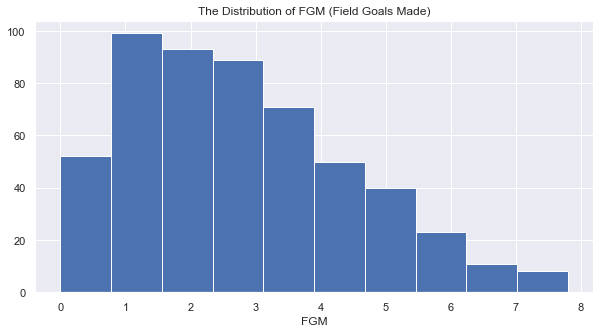

In [1518]:
plt.figure(figsize=(10,5))
plt.hist(df.FGM)
plt.title('The Distribution of FGM (Field Goals Made)')
plt.xlabel("FGM");

* To see the distribution of 3PM :

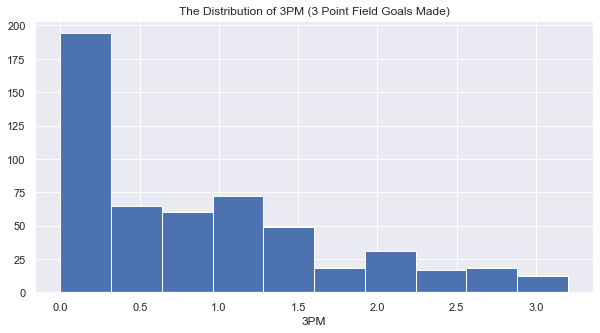

In [1519]:
plt.figure(figsize=(10,5))
plt.hist(df['3PM'])
plt.title('The Distribution of 3PM (3 Point Field Goals Made)')
plt.xlabel("3PM");

* To see the distribution of FTM :

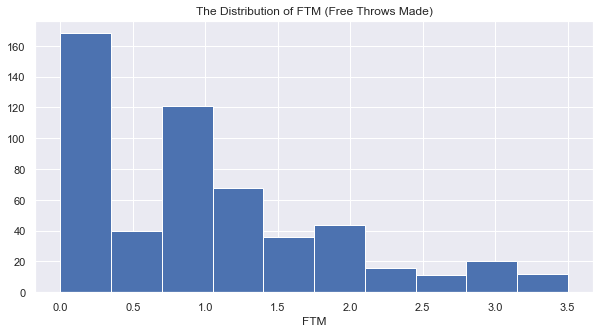

In [1520]:
plt.figure(figsize=(10,5))
plt.hist(df.FTM)
plt.title('The Distribution of FTM (Free Throws Made)')
plt.xlabel("FTM");

* To see the distribution of FP :

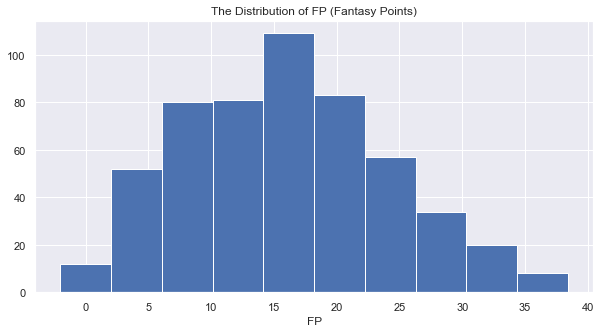

In [1521]:
plt.figure(figsize=(10,5))
plt.hist(df.FP)
plt.title('The Distribution of FP (Fantasy Points)')
plt.xlabel("FP");

* In addition, we used **Tableau** to depict the distribution of all features. All figures are saved in the **Distribution** folder.

Now we have ideas about the details of data statistics.

## 3- Build a Simple Linear Regression Model : 

The term “linearity” in algebra refers to a linear relationship between two or more variables.

We know that the formula of a regression line is basically: y = mx + b
where :
* y is the predicted target label
* m is the slope of the line 
* b is the y intercept.

As the first step, we split the data into two sets :
- Training set.
- Test set. 

let’s keep it simple and use a 80/20 rule. The input variables can be split like so:

In [1522]:
train_set,test_set=train_test_split(df, train_size=0.8, random_state=42, shuffle=True)

As the second step, we split the train set into two sets :
- Train set.
- Validation set.

In [1523]:
train_set,val_set=train_test_split(train_set, train_size=0.75, random_state=42, shuffle=True)

In [1524]:
train_set.shape

(321, 7)

In [1525]:
val_set.shape

(107, 7)

In [1526]:
test_set.shape

(108, 7)

The above script splits 80% of the data to training set while 20% of the data to test set . And then splits 25% of training set to validation set. 

* Let’s pause for a second to check the correlation between the different variables.

In [1527]:
# View the correlations
df_corr=train_set.corr()
df_corr

,MIN,PTS,FGM,3PM,FTM,FP
MIN,1.000000,0.736639,0.710911,0.530353,0.448168,0.791102
PTS,0.736639,1.000000,0.975618,0.591827,0.597428,0.851849
FGM,0.710911,0.975618,1.000000,0.521554,0.505321,0.853146
3PM,0.530353,0.591827,0.521554,1.000000,0.129669,0.439401
FTM,0.448168,0.597428,0.505321,0.129669,1.000000,0.588098
FP,0.791102,0.851849,0.853146,0.439401,0.588098,1.000000


* Let's draw a heatmap of correlations with the numeric values in each cell.

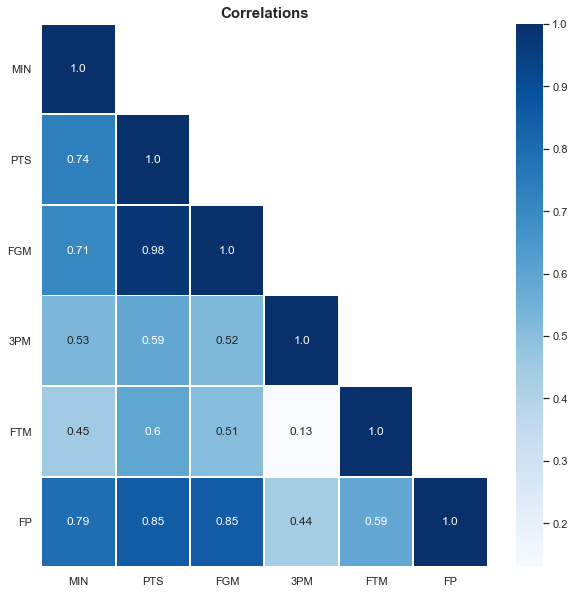

In [1528]:
# View the correlations
array = np.array(df_corr.applymap(lambda x:str(round(x,2))))
sns.set() 
sns.set_style("white")
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr, annot=array, linewidths=1, ax=ax,cmap="Blues",fmt='',linecolor='white',mask=np.triu(df_corr,k=1))
plt.yticks(rotation=0)  
plt.title('Correlations',weight='bold',fontsize=15)
plt.savefig('heatmap_regression.png',transparent=True, bbox_inches='tight')

Consider a PTS as a target, and as the independent variable, we will experiment with various variables depend on the highest correlation: 

- FGM
- MIN
- FP
- 3PM
- FTM
    

Let's try to visualize these correlations all together by using the seaborn pairplot function :

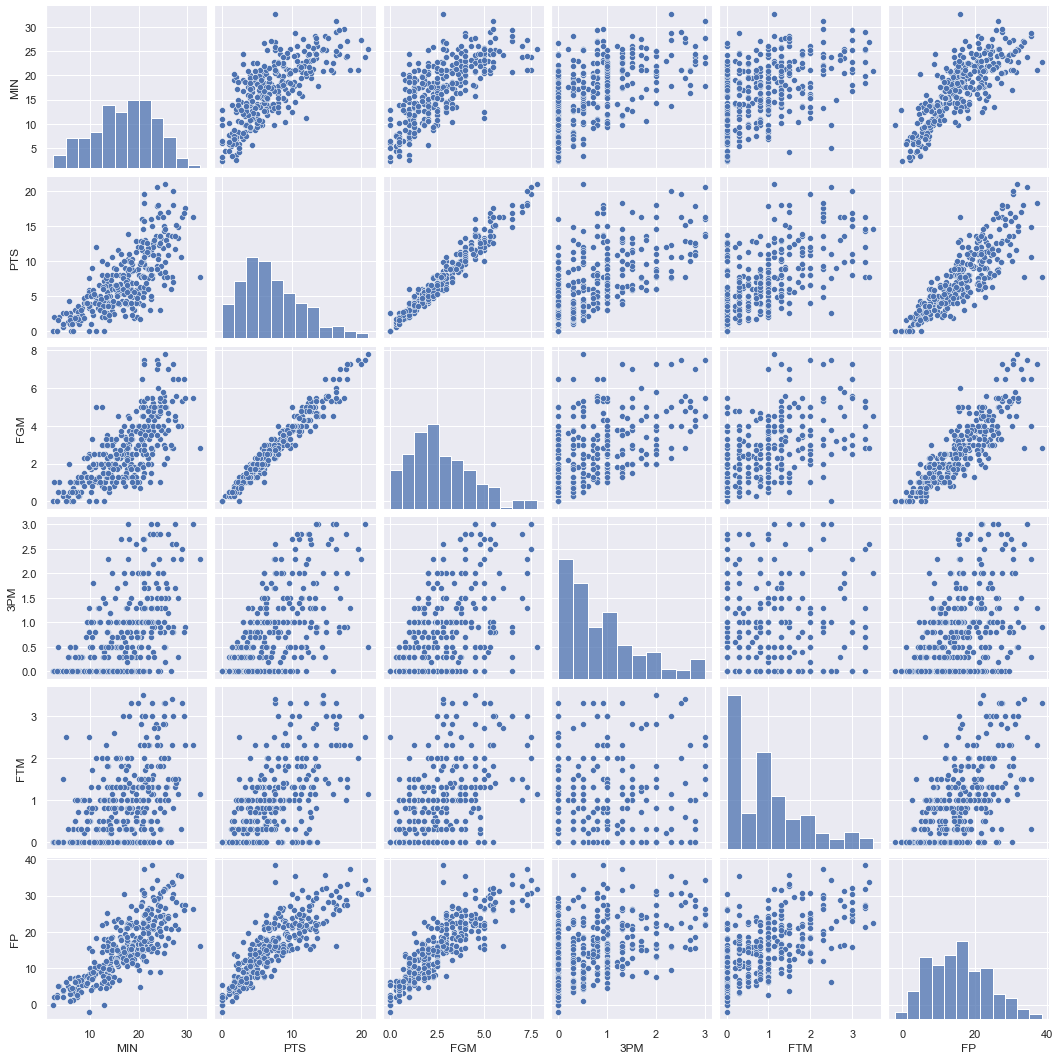

In [1529]:
#Plot all of the variable-to-variable relations as scatterplots
sns.set()
sns.pairplot(train_set,height=2.5);


Let's try to visualize these correlations all together agaist PTS :

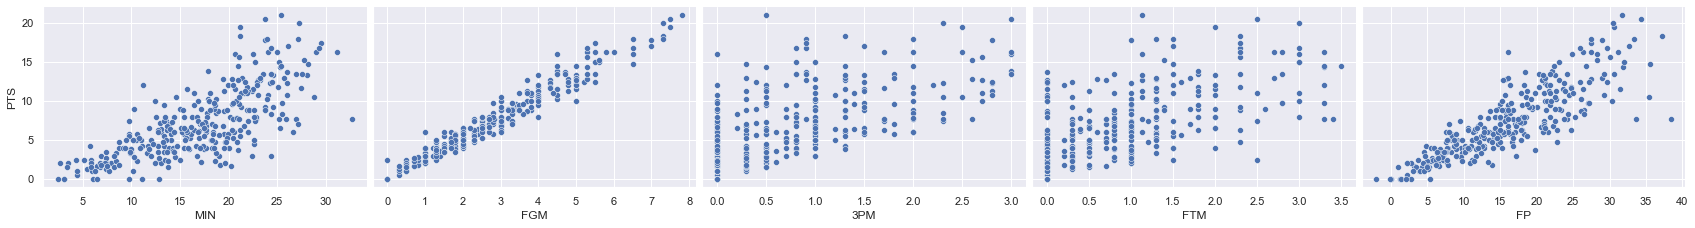

In [1598]:
sns.pairplot(train_set,x_vars=['MIN','FGM','3PM','FTM','FP'],y_vars='PTS', height=3.2, aspect=1.5)
plt.savefig('last_Pair.png')

The next step is to divide the data into “attributes” and “target labels”. Attributes are independent variables, and target labels are dependent variables whose values ​​are to be predicted

* Train set :

In [1531]:
x_train=train_set[['MIN','FGM','3PM','FTM','FP']]
y_train=train_set[['PTS']]

In [1532]:
x_train

,MIN,FGM,3PM,FTM,FP
62,23.5,4.5,1.8,2.8,24.2
149,20.7,4.5,1.3,1.3,31.4
124,12.9,3.0,0.4,0.8,18.0
295,13.8,0.5,0.0,0.5,5.2
406,21.3,3.4,1.0,1.4,20.1
...,...,...,...,...,...
116,13.7,1.5,0.5,0.0,7.3
414,12.8,0.7,0.3,1.0,6.5
422,29.3,6.5,0.8,3.0,25.9
389,21.1,2.7,1.7,0.7,17.4


In [1533]:
y_train

,PTS
62,13.5
149,11.5
124,7.2
295,1.5
406,9.2
...,...
116,3.5
414,2.7
422,16.8
389,7.7


* Validation set :

In [1534]:
x_val=val_set[['MIN','FGM','3PM','FTM','FP']]
y_val=val_set[['PTS']]

In [1535]:
x_val

,MIN,FGM,3PM,FTM,FP
466,23.1,5.5,1.5,1.300000,24.0
16,13.4,0.0,0.0,1.000000,15.3
96,6.8,0.5,0.0,3.000000,6.2
19,21.8,6.0,1.0,0.300000,20.9
366,19.0,2.0,1.0,0.800000,15.3
...,...,...,...,...,...
241,19.2,2.0,0.3,0.000000,13.4
41,19.1,3.7,2.3,1.300000,21.0
447,21.0,5.5,3.0,1.500000,19.6
58,23.9,4.5,0.0,1.800000,26.8


In [1536]:
y_val

,PTS
466,13.8
16,1.0
96,4.0
19,13.3
366,5.8
...,...
241,4.3
41,11.0
447,15.5
58,10.8


* Test set :

In [1537]:
x_test=test_set[['MIN','FGM','3PM','FTM','FP']]
y_test=test_set[['PTS']]

In [1538]:
x_test

,MIN,FGM,3PM,FTM,FP
117,18.4,2.0,0.7,0.700000,18.6
132,13.8,1.5,0.0,0.800000,10.1
154,22.4,4.8,1.3,1.500000,23.1
245,18.4,2.8,0.6,1.200000,22.3
84,18.5,2.5,0.8,0.500000,16.5
...,...,...,...,...,...
375,21.8,0.8,0.6,1.200000,14.0
368,7.6,0.4,0.0,0.200000,5.3
535,6.9,2.0,2.0,2.000000,9.4
384,3.5,1.0,0.0,0.000000,2.0


In [1539]:
y_test

,PTS
117,5.3
132,3.8
154,12.3
245,7.4
84,6.3
...,...
375,3.4
368,1.0
535,8.0
384,2.0


Now is finally the time to train our model. Execute following script:

### Linear regression

In [1540]:
def LinearReg(X_train, Y_train, X_val, Y_val,X_test,Y_test):
    #Create model
    m = LinearRegression()
    #Fit the first model to the training set
    m.fit(X_train, Y_train)
    #Predict y on the validation set
    y_val_pred = m.predict(X_val)
    #To see the R sequare
    RSquared = m.score(X_val, Y_val)
    #To see the MAE
    MAE= metrics.mean_absolute_error(Y_val, y_val_pred)
    #To see the MSE
    MSE= metrics.mean_squared_error(Y_val, y_val_pred)
    #To see the RMSE
    RMSE= np.sqrt(MSE)
    
    #-----------------For testing----------------------------
    
    y_test_pred=m.predict(X_test)
    #To see the R sequare (test)
    RSquaredTest = m.score(X_test, Y_test)
    #To see the MAE (test)
    MAE_test= metrics.mean_absolute_error(Y_test, y_test_pred)
    #To see the MSE (test)
    MSE_test= metrics.mean_squared_error(Y_test, y_test_pred)
    #To see the RMSE (test)
    RMSE_test= np.sqrt(MSE_test)
    
    return [RSquared, MAE, MSE, RMSE,y_val_pred,RSquaredTest,MAE_test,MSE_test,RMSE_test,y_test_pred]

* Model 1 : X ----> MIN:

In [1541]:
model1=LinearReg(x_train[['MIN']], y_train, x_val[['MIN']], y_val,x_test[['MIN']],y_test)

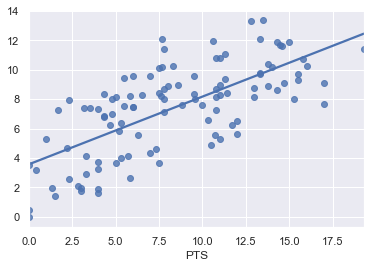

In [1542]:
sns.regplot(x=y_val,y=model1[4],ci=None,color='b');

* Model 2 : X ----> FGM :

In [1543]:
model2=LinearReg(x_train[['FGM']], y_train, x_val[['FGM']], y_val,x_test[['FGM']],y_test)

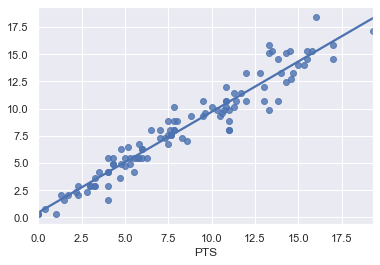

In [1544]:
sns.regplot(x=y_val,y=model2[4],ci=None,color='b');

* Model 3 : X ----> 3PM :

In [1547]:
model3=LinearReg(x_train[['3PM']], y_train, x_val[['3PM']], y_val,x_test[['3PM']],y_test)

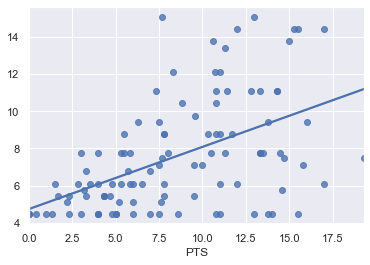

In [1548]:
sns.regplot(x=y_val,y=model3[4],ci=None,color='b');

* Model 4 : X ----> FTM :

In [1549]:
model4=LinearReg(x_train[['FTM']], y_train, x_val[['FTM']], y_val,x_test[['FTM']],y_test)

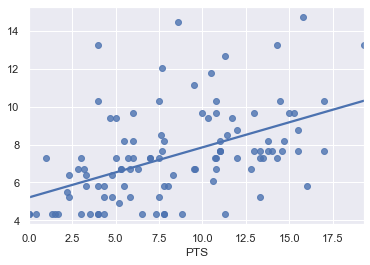

In [1550]:
sns.regplot(x=y_val,y=model4[4],ci=None,color='b');

* Model 5 : X ----> FP :

In [1551]:
model5=LinearReg(x_train[['FP']],y_train, x_val[['FP']], y_val,x_test[['FP']],y_test)

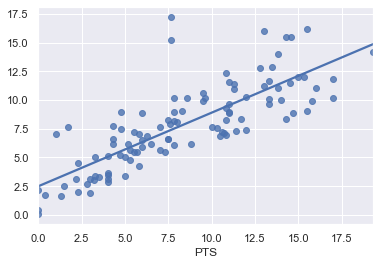

In [1552]:
sns.regplot(x=y_val,y=model5[4],ci=None,color='b');

* Model 6 : X ----> All features:

In [1553]:
model6=LinearReg(x_train[['FGM','FP','MIN','3PM','FTM']],y_train, x_val[['FGM','FP','MIN','3PM','FTM']], y_val,x_test[['FGM','FP','MIN','3PM','FTM']],y_test)

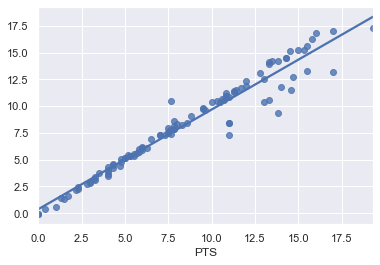

In [1599]:
sns.regplot(x=y_val,y=model6[4],ci=None,color='b');
plt.savefig('regPlot_v.png',transparent=True, bbox_inches='tight')

* Model 7 : X ----> FGM & FP:

In [1555]:
model7=LinearReg(x_train[['FGM','FP']], y_train, x_val[['FGM','FP']], y_val,x_test[['FGM','FP']],y_test)

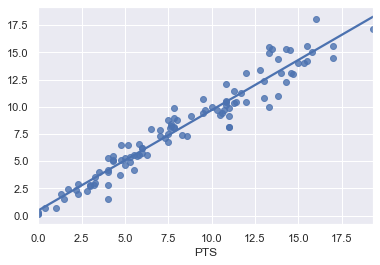

In [1556]:
sns.regplot(x=y_val,y=model7[4],ci=None,color='b');

* Model 8 : X ----> FGM & FP & MIN :

In [1557]:
model8=LinearReg(x_train[['FGM','FP','MIN']],y_train, x_val[['FGM','FP','MIN']], y_val,x_test[['FGM','FP','MIN']],y_test)

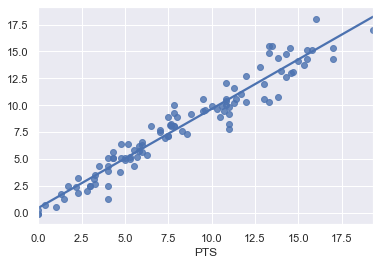

In [1558]:
sns.regplot(x=y_val,y=model8[4],ci=None,color='b');

* Model 9 : X ----> FGM & FP & MIN & 3PM :

In [1559]:
model9=LinearReg(x_train[['FGM','FP','MIN','3PM']],y_train, x_val[['FGM','FP','MIN','3PM']], y_val,x_test[['FGM','FP','MIN','3PM']],y_test)

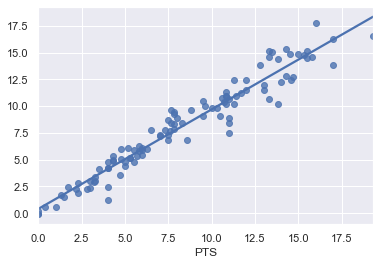

In [1560]:
sns.regplot(x=y_val,y=model9[4],ci=None,color='b');

* Let's see which the best model?

In [1561]:
models= pd.DataFrame(data = [model1[:4], model2[:4], model3[:4], model4[:4], model5[:4],model6[:4],model7[:4],model8[:4],model9[:4]], columns=['R Squared','MAE','MSE','RMSE'],index = ['Linear Regression :M1', 'Linear Regression :M2', 'Linear Regression :M3', 'Linear Regression :M4', 'Linear Regression :M5', 'Linear Regression :M6', 'Linear Regression :M7', 'Linear Regression :M8', 'Linear Regression :M9'])
models

,R Squared,MAE,MSE,RMSE
Linear Regression :M1,0.440002,2.762713,11.693917,3.419637
Linear Regression :M2,0.932539,0.894579,1.408732,1.186900
Linear Regression :M3,0.217894,3.076238,16.331983,4.041285
Linear Regression :M4,0.209180,3.332269,16.513945,4.063735
Linear Regression :M5,0.623489,2.027554,7.862318,2.803983
Linear Regression :M6,0.946808,0.529868,1.110750,1.053921
Linear Regression :M7,0.935802,0.891730,1.340594,1.157840
Linear Regression :M8,0.931737,0.927569,1.425462,1.193927
Linear Regression :M9,0.936611,0.833512,1.323683,1.150514


In [1562]:
best=[models['R Squared'].max(),models['MAE'].min(),models['MSE'].min(),models['RMSE'].min()]

In [1563]:
Best_model= pd.DataFrame(data=[best],columns=['R Squared','MAE','MSE','RMSE'],index=[models['R Squared'].idxmax(axis = 0)])
Best_model

,R Squared,MAE,MSE,RMSE
Linear Regression :M6,0.946808,0.529868,1.11075,1.053921


###### As shown the best model is model 6 which have All features (MIN , FGM , 3PM , FTM , FP) 

### Polynomial Transformation

In [1564]:
def poly(X_train, Y_train, X_val, Y_val, deg):
    #Create model
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    #Fit the model to the training set
    model.fit(X_train, Y_train)
    #Predict y on the validation set
    Y_pred = model.predict(X_val)
    #To see the R sequare
    RSquared2= model.score(X_val, Y_val)
    #To see the MAE
    MAE2= metrics.mean_absolute_error(Y_val, Y_pred)
    #To see the MSE
    MSE2= metrics.mean_squared_error(Y_val, Y_pred)
    #To see the RMSE
    RMSE2= np.sqrt(MSE2)

    return [RSquared2, MAE2, MSE2, RMSE2]

In [1565]:
#All features with Polynomial Transformation
model10=poly(x_train.iloc[:, :], y_train, x_val.iloc[:,:], y_val,2)

In [1566]:
poly=pd.DataFrame(data = [model10], columns=['R Squared','MAE','MSE','RMSE'],index = ['Polynomial Features'])
models2=Best_model.append(poly)
models2

,R Squared,MAE,MSE,RMSE
Linear Regression :M6,0.946808,0.529868,1.110750,1.053921
Polynomial Features,0.943589,0.553953,1.177971,1.085344


Let's see which the best model?

In [1567]:
best2=[models2['R Squared'].max(),models2['MAE'].min(),models2['MSE'].min(),models2['RMSE'].min()]
Best_model2=pd.DataFrame(data=[best2],columns=['R Squared','MAE','MSE','RMSE'],index=[models2['R Squared'].idxmax(axis = 0)])
Best_model2

,R Squared,MAE,MSE,RMSE
Linear Regression :M6,0.946808,0.529868,1.11075,1.053921


###### As shown the best model is model 6 which have All features (MIN , FGM , 3PM , FTM , FP) 

# Regularization

In [1568]:
def Gsearch(model, X_t, y_t):
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    params = {"alpha": np.linspace(0, 1, num=100)}
    GS = GridSearchCV(model, param_grid=params, cv=kf)
    GS.fit(X_t, y_t);
    return GS

In [1569]:
def Lasso_(X_train, y_train, X_val, y_val):
    #To find the best alpha for Lasso
    L_GS = Gsearch(Lasso(), X_train, y_train)
    b_alpha_L = L_GS.best_estimator_.alpha
    #To create the model
    model_L = Lasso(b_alpha_L)
    #Fit the model to the training set
    model_L.fit(X_train, y_train)
    #Predict y on the validation set
    y_pred_L = model_L.predict(X_val)
    #To see the R sequare
    r_squared_L = model_L.score(X_val, y_val)
    #To see the MAE
    MAE_L= metrics.mean_absolute_error(y_val, y_pred_L)
    #To see the MSE
    MSE_L = metrics.mean_squared_error(y_val, y_pred_L)
    #To see the RMSE
    RMSE_L = np.sqrt(MSE_L)
    
    return [r_squared_L, MAE_L, MSE_L, RMSE_L, b_alpha_L]

In [1570]:
def Ridge_(X_train, y_train, X_val, y_val):
    #finding the best alpha for Ridge
    R_GS = Gsearch(Ridge(), X_train, y_train)
    b_alpha_R = R_GS.best_estimator_.alpha
    #To create the model
    model_R = Ridge(b_alpha_R)
    #Fit the model to the training set
    model_R.fit(X_train, y_train)
    #Predict y on the validation set
    y_pred_R = model_R.predict(X_val)
    #To see the R sequare
    r_squared_R = model_R.score(X_val, y_val)
    #To see the MAE
    MAE_R = metrics.mean_absolute_error(y_val, y_pred_R)
    #To see the MSE
    MSE_R = metrics.mean_squared_error(y_val, y_pred_R)
    #To see the RMSE
    RMSE_R = np.sqrt(MSE_R)
    
    return [r_squared_R, MAE_R, MSE_R, RMSE_R, b_alpha_R]

In [1571]:
lasso = Lasso_(x_train, y_train, x_val, y_val)
ridge = Ridge_(x_train, y_train, x_val, y_val)

C:\Users\Rim24\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Rim24\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rim24\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.900404718254485, tolerance: 0.5137072336309395
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rim24\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimato

In [1572]:
regularization_results = pd.DataFrame(data = [lasso, ridge], columns=['R Squared','MAE','MSE','RMSE','Best Alpha'],index = ['Lasso', 'Ridge'])
regularization_results

,R Squared,MAE,MSE,RMSE,Best Alpha
Lasso,0.946808,0.529868,1.110750,1.053921,0.000000
Ridge,0.946821,0.529685,1.110496,1.053801,0.060606


# Prediction

Now that we have trained our algorithm,and we know that the Model 6 is the best model. So it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make pre-dictions on the test data, execute the following script:

In [1573]:
#To compare the actual output values for x_test with predicted values, execute the following script 
actual_VS_pred= pd.DataFrame()
actual_VS_pred['Actual']=y_test['PTS']
actual_VS_pred['Predicted']=model6[9]
actual_VS_pred.head()
#The output looks like that

,Actual,Predicted
117,5.3,5.344501
132,3.8,3.881881
154,12.3,12.680631
245,7.4,7.381836
84,6.3,6.411974


Our model is very accurate ,the predicted value is close to the actual value.

In [1574]:
#To compare between the validation result & test result
validation=[model6[0],model6[1],model6[2],model6[3]]
test=[model6[5],model6[6],model6[7],model6[8]]
test_VS_val= pd.DataFrame(data = [validation, test], columns=['R Squared','MAE','MSE','RMSE'],
                 index = ['Validaion result', 'Test result'])
test_VS_val

,R Squared,MAE,MSE,RMSE
Validaion result,0.946808,0.529868,1.110750,1.053921
Test result,0.909511,0.413878,1.860345,1.363945


- As the results demonstrated, the test result was very close to the validation result, implying that our model is very accurate on unseen data.

* To plot the test result:

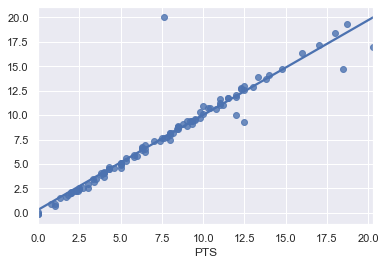

In [1575]:
sns.regplot(x=y_test,y=model6[9],ci=None,color='b');

# Classification

In [1576]:
#Read the CSV file
df_class=pd.read_csv('Players_data.csv')

In [1577]:
df_class.head()

,PLAYER,MIN,PTS,FGM,3PM,FTM,FP
0,Ziaire Williams,22.8,8.2,2.6,0.6,2.4,15.7
1,Zeke Nnaji,14.3,3.6,1.4,0.6,0.2,10.2
2,Zach LaVine,29.0,22.5,7.8,2.8,4.3,33.8
3,Yves Pons,12.2,2.2,0.8,0.2,0.4,6.9
4,Yuta Watanabe,16.9,10.0,4.0,2.0,0.0,30.4


In [1578]:
#To see statistical details of the dataset, we can use df.describe()
df_class.describe()

,MIN,PTS,FGM,3PM,FTM,FP
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,16.978358,7.646828,2.820522,0.909888,1.127612,16.069776
std,6.273971,4.807143,1.775437,0.915901,1.128999,8.295542
min,1.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,12.700000,4.000000,1.400000,0.000000,0.300000,9.775000
50%,17.800000,6.800000,2.500000,0.700000,1.000000,15.600000
75%,21.500000,10.800000,4.000000,1.300000,1.625000,21.800000
max,32.700000,25.000000,8.500000,4.300000,5.800000,43.600000


In [1579]:
#To create binary column for classification (Low (0) & High (1))
df_class['PTS_class']=df_class.PTS.map(lambda x:0 if (x<=df_class.PTS.mean()) else 1 )
df_class.PTS_class.value_counts()

0    297
1    239
Name: PTS_class, dtype: int64

In [1580]:
df_class['PTS_class_name']=df_class.PTS_class.map(lambda x:'Low' if (x==0) else 'High' )

In [1581]:
#To display the first 5 rows :
df_class.head()

,PLAYER,MIN,PTS,FGM,3PM,FTM,FP,PTS_class,PTS_class_name
0,Ziaire Williams,22.8,8.2,2.6,0.6,2.4,15.7,1,High
1,Zeke Nnaji,14.3,3.6,1.4,0.6,0.2,10.2,0,Low
2,Zach LaVine,29.0,22.5,7.8,2.8,4.3,33.8,1,High
3,Yves Pons,12.2,2.2,0.8,0.2,0.4,6.9,0,Low
4,Yuta Watanabe,16.9,10.0,4.0,2.0,0.0,30.4,1,High


As the first step, we split the data into two sets :

- Training set.
- Test set.

let’s keep it simple and use a 80/20 rule. The input variables can be split like so:

In [1582]:
train_set_class,test_set_class=train_test_split(df_class, train_size=0.8, random_state=42, shuffle=True)

As the second step, we split the train set into two sets :

- Train set.
- Validation set.

In [1583]:
train_set_class,val_set_class=train_test_split(train_set_class, train_size=0.75, random_state=42, shuffle=True)

The next step is to divide the data into “attributes” and “target labels”. Attributes are independent variables, and target labels are dependent variables whose values ​​are to be predicted

- Train set :

In [1584]:
x_train_set_class=train_set_class[['MIN', 'PTS', 'FGM', '3PM', 'FTM', 'FP']]
y_train_set_class=train_set_class[['PTS_class']]

- Validation set :

In [1585]:
x_val_set_class=val_set_class[['MIN', 'PTS', 'FGM', '3PM', 'FTM', 'FP']]
y_val_set_class=val_set_class[['PTS_class']]

- Test set :

In [1586]:
x_test_set_class=test_set_class[['MIN', 'PTS', 'FGM', '3PM', 'FTM', 'FP']]
y_test_set_class=test_set_class[['PTS_class']]

In [1587]:
y_train_set_class.shape

(321, 1)

In [1588]:
x_val_set_class.shape

(107, 6)

In [1589]:
y_val_set_class.shape

(107, 1)

In [1590]:
x_train_set_class.shape

(321, 6)

This method is to create classification model:

In [1591]:
def D_Tree(x_train_set_class, y_train_set_class, x_val_set_class, y_val_set_class,x_test_set_class,y_test_set_class, depth):
    #Create the model
    model_class = DecisionTreeClassifier(max_depth= depth)
    model_class.fit(x_train_set_class, y_train_set_class)
    #Predict y on the validation set
    y_pred_class = model_class.predict(x_val_set_class)
    #To see the results
    results_class =  metrics.classification_report(y_val_set_class, y_pred_class, target_names=['0','1'], output_dict = True)
    
    #------------------------ For testing ---------------------------
    
    y_pred_class_test=model_class.predict(x_test_set_class)
    results_class_test =metrics.classification_report(y_test_set_class, y_pred_class_test, target_names=['0','1'], output_dict = True)

    return  [results_class['accuracy'], results_class['weighted avg']['precision'], 
             results_class['weighted avg']['recall'],y_pred_class_test,results_class_test]

In [1592]:
depth = 2
m1_class=D_Tree(x_train_set_class, y_train_set_class, x_val_set_class, y_val_set_class,x_test_set_class,y_test_set_class,depth)

In [1593]:
#To see the result
D_Tree_results = pd.DataFrame(data = [m1_class[:3]], columns=['Accuracy','Precision','Recall'],
        index = ['Decision Tree'])
D_Tree_results

,Accuracy,Precision,Recall
Decision Tree,1.0,1.0,1.0


### Prediction

Now that we have trained our algorithm. So it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make pre-dictions on the test data, execute the following script:

In [1594]:
#To compare the actual output values for x_test_set_class with predicted values, execute the following script 
actual_VS_pred_class= pd.DataFrame()
actual_VS_pred_class['Actual']=y_test_set_class['PTS_class']
actual_VS_pred_class['Predicted']=m1_class[3]
actual_VS_pred_class.head()
#The output looks like that

,Actual,Predicted
117,0,0
132,0,0
154,1,1
245,0,0
84,0,0


Our model is very accurate ,the predicted value is same to the actual value.

In [1595]:
#To compare between the validation result & test result
validation_class=[m1_class[0],m1_class[1],m1_class[2]]
tt=m1_class[4]
t=[tt['accuracy'], tt['weighted avg']['precision'], tt['weighted avg']['recall']]
test_class=[t[0],t[1],t[2]]
test_VS_val_class= pd.DataFrame(data = [validation_class, test_class], columns=['Accuracy','Precision','Recall'],
                 index = ['Validaion result', 'Test result'])
test_VS_val_class

,Accuracy,Precision,Recall
Validaion result,1.0,1.0,1.0
Test result,1.0,1.0,1.0


- As the results demonstrated, the test result was same the validation, implying that our model is very accurate on unseen data.

* To plot the test result:

In [1596]:
print('Target variables  : ', np.unique(df_class['PTS_class_name']))
(unique, counts) = np.unique(df_class['PTS_class'], return_counts=True)
print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)
cat=['High','Low']
cot=[239,297]

Target variables  :  ['High' 'Low']
Unique values of the target variable [0 1]
Counts of the target variable : [297 239]


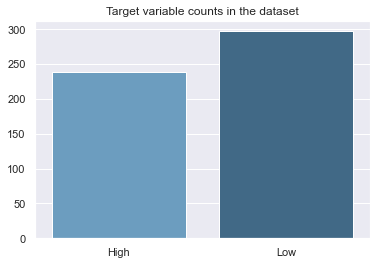

In [1597]:
sns.barplot(x=cat,y=cot,palette="Blues_d")
plt.title('Target variable counts in the dataset')
plt.show()